**Классификация изображений с помощью сверточных нейронных сетей**

В данном задании Вам необходимо разработать архитектуру сверточной ИНС, обеспечивающую наибольшую точность при ограничении на количество операций (FLOPs <= 0.707e6).
Заготовка кода для выполнения задания приведена выше. Вашей задачей будет заполнить пропущеные места, которые отмечены ключевым словом *None*.
Необходимая точность (accuracy) сети на датасете CIFAR100 - 30%
Желаемая точность (accuracy) сети на датасете CIFAR100 - 45%

In [65]:
!pip install keras-flops

In [66]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import tensorflow as tf
from keras_flops import get_flops

In [67]:
# Глобальные константы
CLASSES       = 100
BATCH_SIZE    = 128
LEARNING_RATE = 1e-2

In [68]:
# Выполните загрузку модели
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar100.load_data()

In [69]:
# Преобразуйте метки классов в one_hot формат
y_train = (y_train == np.arange(CLASSES)).astype(np.float32)
y_val = (y_val == np.arange(CLASSES)).astype(np.float32)

In [70]:
print(y_val.shape)

(10000, 100)


In [71]:
# убедитесь, что данная ячейка выполняется без ошибок
assert X_train.shape == (50000, 32, 32, 3)
assert X_val.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 100)
assert y_val.shape == (10000, 100)

In [72]:
# Задайте архитектуру модели
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=[32,32,3]),
    tf.keras.layers.SeparableConv2D(16, 3, padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = 3),
    tf.keras.layers.SeparableConv2D(16, 3, padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('softmax')
])

In [73]:
# вычисление количества операций
flops = get_flops(model, batch_size=1)
print(f"FLOPs: {(flops / 1e6):.4f}e6")


=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.
flops: Number of float operations. Note: Please read the implementation for the math behind it.

Profi

2023-01-25 17:07:12.980074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 17:07:12.980463: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2023-01-25 17:07:12.980637: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2023-01-25 17:07:12.981155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 17:07:12.981529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 17:07:12.981837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

le:
node name | # float_ops
_TFProfRoot (--/698.26k flops)
  sequential_6/dense_11/MatMul (409.60k/409.60k flops)
  sequential_6/separable_conv2d_10/separable_conv2d (86.40k/135.00k flops)
    sequential_6/separable_conv2d_10/separable_conv2d/depthwise (48.60k/48.60k flops)
  sequential_6/separable_conv2d_11/separable_conv2d (32.77k/51.20k flops)
    sequential_6/separable_conv2d_11/separable_conv2d/depthwise (18.43k/18.43k flops)
  sequential_6/dense_12/MatMul (40.00k/40.00k flops)
  sequential_6/batch_normalization_21/FusedBatchNormV3 (28.90k/28.90k flops)
  sequential_6/max_pooling2d_5/MaxPool (14.40k/14.40k flops)
  sequential_6/separable_conv2d_10/BiasAdd (14.40k/14.40k flops)
  sequential_6/batch_normalization_22/FusedBatchNormV3 (2.14k/2.14k flops)
  sequential_6/separable_conv2d_11/BiasAdd (1.02k/1.02k flops)
  sequential_6/activation_30/Softmax (500/500 flops)
  sequential_6/dense_11/BiasAdd (200/200 flops)
  sequential_6/batch_normalization_23/batchnorm/Rsqrt (200/200 flops)


In [74]:
# вывод краткой информации о модели
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_10 (Separab (None, 30, 30, 16)        91        
_________________________________________________________________
batch_normalization_21 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
activation_27 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
separable_conv2d_11 (Separab (None, 8, 8, 16)          416       
_________________________________________________________________
batch_normalization_22 (Batc (None, 8, 8, 16)          64        
_________________________________________________________________
activation_28 (Activation)   (None, 8, 8, 16)         

In [75]:
# параметры данной ячейки могут быть изменены для получения более высокой точности
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, decay_steps=1000, decay_rate=0.3)
    ),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [76]:
# обучения модели
hist = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=BATCH_SIZE,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(filepath="{epoch:02d}-{val_accuracy:.2f}.hdf5", save_best_only=True),
        
    ],
    use_multiprocessing=True,
    workers=8,
    epochs=30
)

Epoch 1/30
391/391 [==============================] - 5s 11ms/step - loss: 3.6817 - accuracy: 0.1461 - val_loss: 4.1613 - val_accuracy: 0.1059
Epoch 2/30
391/391 [==============================] - 4s 10ms/step - loss: 3.2071 - accuracy: 0.2260 - val_loss: 3.2337 - val_accuracy: 0.2324
Epoch 3/30
391/391 [==============================] - 4s 10ms/step - loss: 3.0124 - accuracy: 0.2619 - val_loss: 2.9439 - val_accuracy: 0.2901
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 2.8855 - accuracy: 0.2847 - val_loss: 2.8396 - val_accuracy: 0.3119
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 2.8062 - accuracy: 0.3024 - val_loss: 2.8073 - val_accuracy: 0.3136
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 2.7465 - accuracy: 0.3133 - val_loss: 2.7672 - val_accuracy: 0.3237
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 2.7067 - accuracy: 0.3201 - val_loss: 2.7416 - val_accuracy: 0.3276

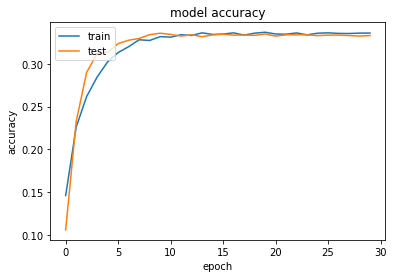

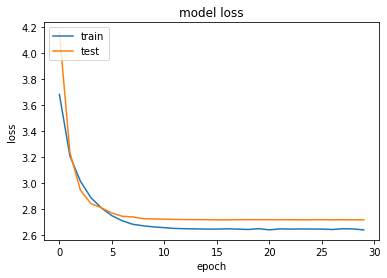

In [77]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()